In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import h5py
import os

In [74]:
f2 = h5py.File('/global/ml4hep/spss/mfong/transfer_learning/test.h5', 'r')

In [78]:
f2["fjet_pt"][:].shape

(2484117,)

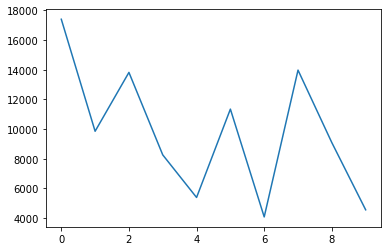

In [59]:
plt.plot((f["fjet_clus_E"][:10]).mean(axis=1))

In [4]:
os.listdir("/clusterfs/ml4hep/mfong/transfer_learning/")

['delphes_test.h5', 'delphes_train.h5']

In [29]:
f = h5py.File('/clusterfs/ml4hep/mfong/transfer_learning/delphes_train.h5', 'r')

In [40]:
# try ignoring E, use just eta phi pt
for k in f.keys():
    print(k, f[k].shape)

fjet_clus_E (4000068, 200)
fjet_clus_eta (4000068, 200)
fjet_clus_phi (4000068, 200)
fjet_clus_pt (4000068, 200)
fjet_eta (4000068,)
fjet_m (4000068,)
fjet_phi (4000068,)
fjet_pt (4000068,)
labels (4000068,)


In [62]:
a = f["fjet_clus_pt"][:]

In [72]:
(a > 0)

array([[ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False]])

(array([3.53088e+05, 7.89896e+05, 8.09545e+05, 6.78692e+05, 5.99133e+05,
        4.89836e+05, 2.46133e+05, 3.10530e+04, 2.56200e+03, 1.30000e+02]),
 array([ 1751.2684,  4315.3174,  6879.3657,  9443.415 , 12007.464 ,
        14571.512 , 17135.56  , 19699.61  , 22263.658 , 24827.707 ,
        27391.756 ], dtype=float32),
 <BarContainer object of 10 artists>)

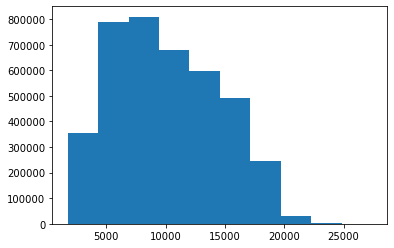

In [70]:
plt.hist(a.mean(axis=1))

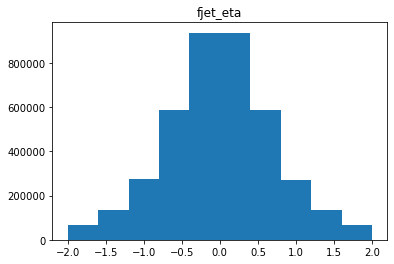

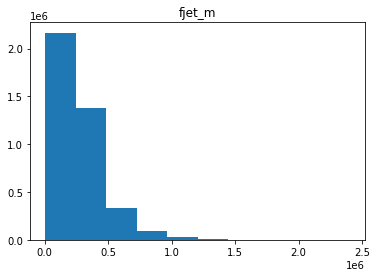

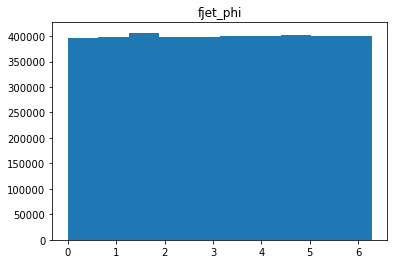

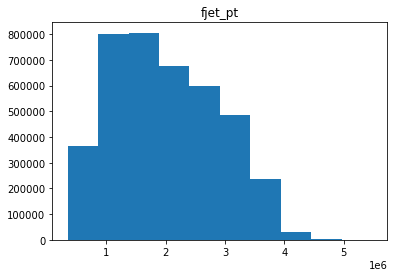

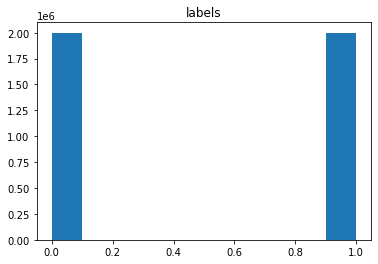

In [47]:
for k in list(f.keys())[4:]:
    plt.hist(f[k])
    plt.title(k)
    plt.show()

In [44]:
f["labels"][:].mean()

0.5000012499787504

(array([[9.046830e+05, 1.115338e+06, 7.060820e+05, ..., 4.100000e+01,
         2.200000e+01, 2.000000e+00],
        [1.867996e+06, 1.381827e+06, 4.958530e+05, ..., 0.000000e+00,
         0.000000e+00, 0.000000e+00],
        [2.796846e+06, 1.057714e+06, 1.313810e+05, ..., 0.000000e+00,
         0.000000e+00, 0.000000e+00],
        ...,
        [4.000068e+06, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
         0.000000e+00, 0.000000e+00],
        [4.000068e+06, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
         0.000000e+00, 0.000000e+00],
        [4.000068e+06, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
         0.000000e+00, 0.000000e+00]]),
 array([      0. ,  217849.5,  435699. ,  653548.5,  871398. , 1089247.5,
        1307097. , 1524946.5, 1742796. , 1960645.5, 2178495. , 2396344.5,
        2614194. , 2832043.5, 3049893. , 3267742.5, 3485592. , 3703441.5,
        3921291. , 4139140.5, 4356990. ], dtype=float32),
 <a list of 200 BarContainer objects>)

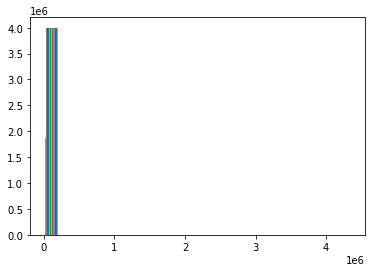

In [45]:
plt.hist(f["fjet_clus_E"][:], bins=20)